In [1]:
import cv2
import itertools
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd
import random
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

ROWS = 180
COLS = 180
CHANNELS = 3

In [2]:
dogs_dir = './pet-images/dog'
cats_dir = './pet-images/cat'
dog_paths = [os.path.join(dogs_dir, p) for p in os.listdir(dogs_dir)]
cat_paths = [os.path.join(cats_dir, p) for p in os.listdir(cats_dir)]

In [3]:
print(random.choices(dog_paths, k=10))
print(random.choices(cat_paths, k=10))

['./pet-images/dog/718.jpg', './pet-images/dog/2265.jpg', './pet-images/dog/11381.jpg', './pet-images/dog/2969.jpg', './pet-images/dog/9132.jpg', './pet-images/dog/8241.jpg', './pet-images/dog/9916.jpg', './pet-images/dog/12177.jpg', './pet-images/dog/353.jpg', './pet-images/dog/9159.jpg']
['./pet-images/cat/8070.jpg', './pet-images/cat/4461.jpg', './pet-images/cat/1129.jpg', './pet-images/cat/11471.jpg', './pet-images/cat/6905.jpg', './pet-images/cat/11748.jpg', './pet-images/cat/4966.jpg', './pet-images/cat/7235.jpg', './pet-images/cat/1308.jpg', './pet-images/cat/3617.jpg']


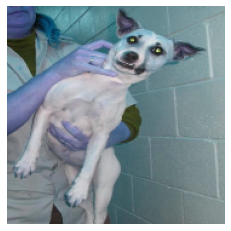

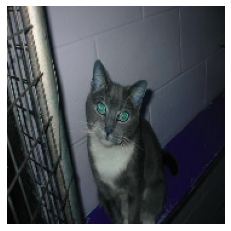

In [4]:
def read_image_from_file(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

plt.axis("off")
plt.imshow(read_image_from_file(random.choices(dog_paths, k=1)[0]))
plt.show()
plt.axis("off")
plt.imshow(read_image_from_file(random.choices(cat_paths, k=1)[0]))
plt.show()

In [5]:
X = []
print('Loading cat images...')
for i in range(len(cat_paths)):
    img = read_image_from_file(cat_paths[i])
    X.append(img.flatten() / 255)

print(len(X))
print('Loading dog images...')
for i in range(len(dog_paths)):
    img = read_image_from_file(dog_paths[i])
    X.append(img.flatten() / 255)
print(len(X))

Loading cat images...
11741
Loading dog images...
23410


In [6]:
y = [0] * len(cat_paths)
y.extend([1] * len(dog_paths))
print(len(y))

23410


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.linear_model import LogisticRegression as lr

clf = lr(tol=2e-4, max_iter=200, C=0.1)
# 1e-4 does not converge
# tried C = [0.1, 0.25， 0.5a gentle wind., 1 (default)]: seems no big difference
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
np.random.choice(a=predicted, size=100)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

Confusion matrix:
[[1364  955]
 [1054 1309]]


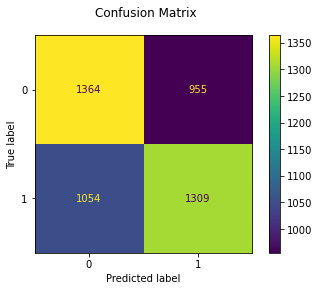

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[1364,  955],
       [1054, 1309]])

Confusion matrix:
[[7943 1479]
 [1582 7724]]


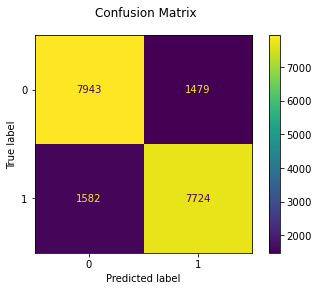

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=clf.predict(X_train))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()